In [ ]:
import pandas as pd
import numpy as np

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

pd.options.display.float_format = '${:,.2f}'.format
dados.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


Importando dados via csv, descobrindo os dados com a função head()

In [ ]:
# Desafio 01: média da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].mean()


Bairro
Aclimação           $253.06
Alto da Boa Vista   $418.88
Alto da Lapa        $294.34
Alto da Mooca       $270.05
Alto de Pinheiros   $433.44
                      ...  
Vila Água Funda     $152.20
Água Branca         $191.00
Água Fria           $165.42
Água Funda          $139.00
Água Rasa           $340.25
Name: Metragem, Length: 701, dtype: float64

 Desafio 01: média da metragem de todos os bairros
Para isso: 
* Usar a função groupby que, automaticamente agrupa os dados de acordo com parâmetro, semelhante ao SQL;
  * pode-se restringir o groupby, para não ser aplicado a valores nulos, com parametro (dropna = False);
  * parametro axis permite agrupar por linhas;
  



---



In [ ]:
#Desafio 02: duas formas de selecionar os dados por bairro
parametro_bairro = "Vila Madalena"
dados.loc[(dados['Bairro'] == parametro_bairro)]

dados.query('Bairro == @parametro_bairro')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


0       $7,000,000.00
1       $3,700,000.00
2         $380,000.00
3         $685,000.00
4         $540,000.00
             ...     
10003     $665,000.00
10004   $2,300,000.00
10005   $1,050,000.00
10006       $2,200.00
10007     $270,000.00
Name: Valor, Length: 10008, dtype: float64

Desafio 02: duas formas de selecionar os dados por bairro
* primeira forma: loc - a função é responsável por filtrar, sendo que o parametro pode ser uma series de booleanos;
* segunda forma: mais próxima da notação SQL, cujo parâmetro é uma string com os nomes das colunas. Dessa forma, não precisa mencionar sempre o dataframe que será utilizado. Esta notação é mais simples e legível.

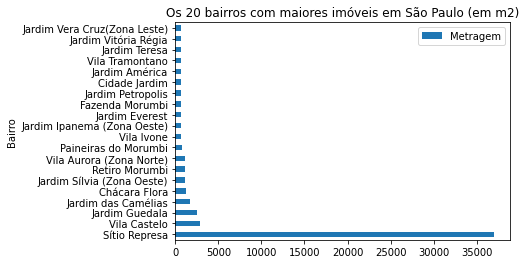

In [ ]:
# Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)
dados_grafico_1 = dados.groupby("Bairro")[["Bairro","Metragem","Quartos","Banheiros","Vagas","Valor"]]
dados_grafico_1.mean().sort_values(by = "Metragem", ascending = False).head(20).plot.barh(y = "Metragem", title = "Os 20 bairros com maiores imóveis em São Paulo (em m2)", ylim=(0,40000))


Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
* neste primeiro gráfico, procurar pelos bairros da cidade de São Paulo que possuem imóveis com a maior metragem (em média). **Por que?** nos dados não existem informações sobre o período da precificação dos imóveis, porém é sabido que durante a pandemia houve uma procura maior por imóveis com maior metragem, devido a migração das pessoas para o home office, crianças mais tempo em casa, etc - é um dado a ser trabalhado futuramente;
* de toda forma, é necessária a filtragem desses dados devido o bairro Sítio Represa, por exemplo, apresentar uma metragem muito alta em relação aos demais (37.000 m2, em média);
* foi escolhido gráfico do tipo barras horizontais para comparação entre bairros, não foi escolhido barras verticais porque não há análise de tempo (dias, meses, anos);


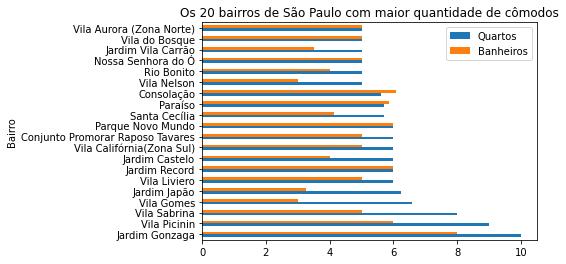

In [ ]:
# Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)
dados_grafico_1 = dados.groupby("Bairro")[["Bairro","Quartos","Banheiros","Valor"]]
dados_grafico_1.mean().sort_values(by = "Quartos", ascending = False).head(20).plot.barh(title = "Os 20 bairros de São Paulo com maior quantidade de cômodos", ylim=(0,15))


Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
* neste segundo gráfico, procurar pelos bairros da cidade de São Paulo que possuem imóveis com maior quantidade de cômodos. Seguindo a mesma temática anterior, nos dados não existem infromações sobre o período da precificação dos imóveis, porém é sabido que durante a pandemia houve uma procura maior por imóveis com maior metragem, devido a migração das pessoas para o home office, crianças mais tempo em casa, etc - é um dado a ser trabalhado futuramente;
* de toda forma, é necessária a filtragem desses dados. Existe relação entre a metragem de um imóvel e a quantidade de cômodos, conforme gráfico anterior? (Verificar posteriormente)
* foi escolhido gráfico do tipo barras horizontais para comparação entre bairros, não foi escolhido barras verticais porque não há análise de tempo (dias, meses, anos);


In [ ]:
# Desafio 04.1: mediana da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].median()

# Desafio 04.2: min da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].min()

# Desafio 04.2: max da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].max()

#Outra forma de visualizar os dados mínimo, máximo, média, etc
dados.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,"$10,008.00","$10,008.00","$10,008.00","$10,008.00",10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,$442.30,$3.48,$3.88,$4.10,NaN
std,NaN,NaN,NaN,"$7,515.38",$1.06,$1.99,$2.82,NaN
min,NaN,NaN,NaN,$10.00,$1.00,$1.00,$1.00,NaN
25%,NaN,NaN,NaN,$173.00,$3.00,$2.00,$2.00,NaN
50%,NaN,NaN,NaN,$290.00,$3.00,$4.00,$4.00,NaN
75%,NaN,NaN,NaN,$460.25,$4.00,$5.00,$5.00,NaN


Desafio 04 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [ ]:
#Desafio 05 - descobrir quais bairros não tem nome de rua
filtro_nome_rua = [dados.Rua.isnull()]
dados.loc[dados.Rua.isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


Desafio 05 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)